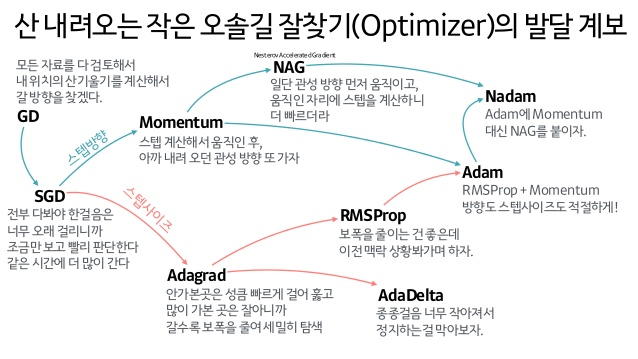

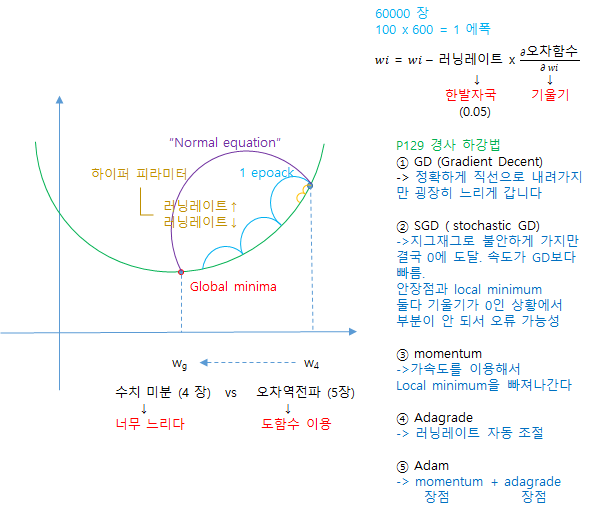

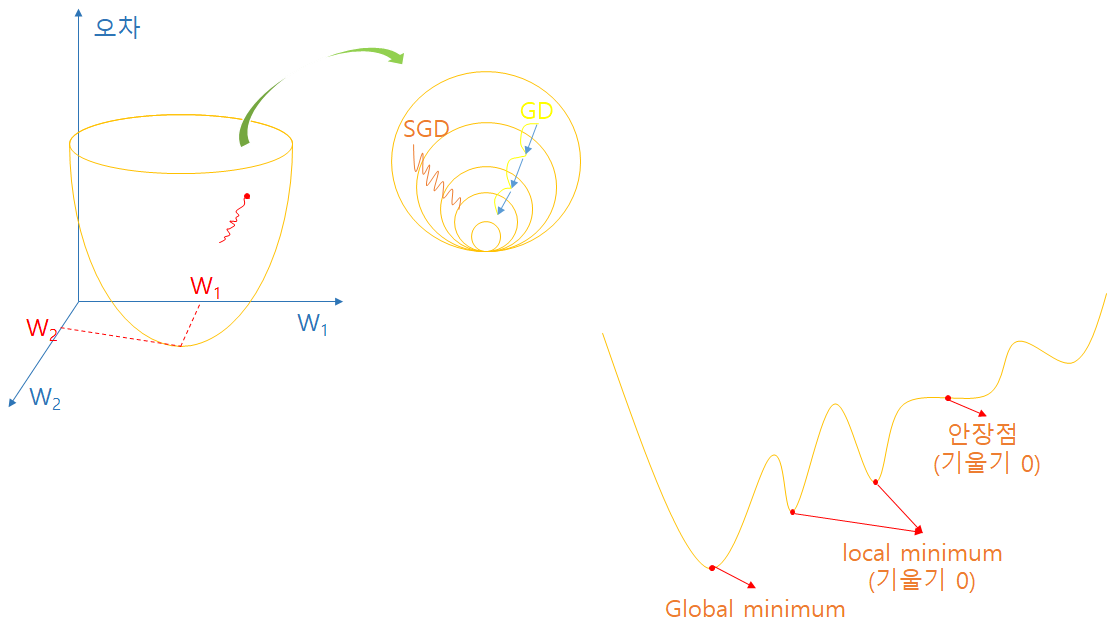

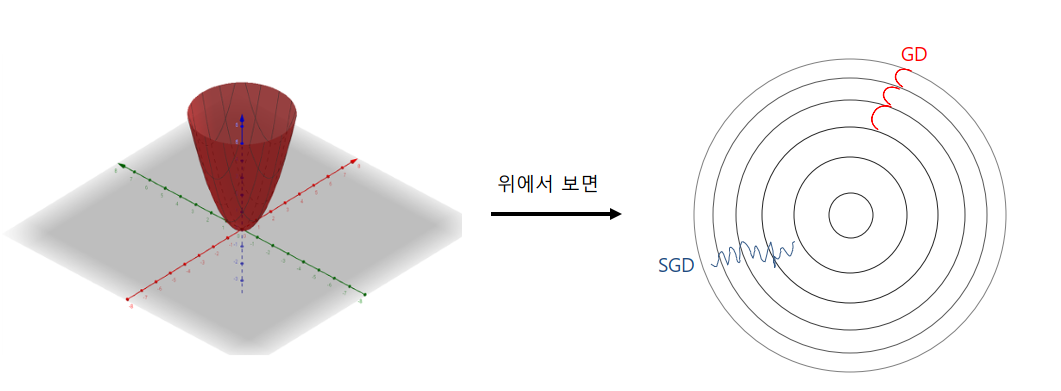

## ■ 신경망을 학습시키기 위해 필요한 3가지

1. __오차함수 :__ 신경망이 무엇을 잘못했는지 깨닫게 해주는 함수
2. __미니배치 :__ 학습속도를 빠르게 하기 위해서 필요한 것
3. __수치미분 :__ 가중치(w)를 갱신하기 위해서 필요

## ■ 편미분 P.125

__" 변수가 2개 이상인 함수를 미분할 때 미분 대상 변수외에 나머지 변수를 상수처럼 고정시켜 미분하는 것을 편미분이라고 한다."__

### ※ 신경망 학습시 편미분이 왜 필요한가?

__" 우리가 알아야하는 가중치가 여러개이기 때문에 필요하다. "__

W1 = W1 - Running rate * 기울기  
W2 = W2 - Running rate * 기울기    
W3 = W3 - Running rate * 기울기  

## 예제1. 손으로 아래의 공식을 편미분 하시오!  
### f(x0,x1) = x0^2 + x1^2 함수를 편미분하는데  
### x0 = 3 , x1= 4 일때 x0에 대해 편미분하시오!  

y_prime = 2x0^1 --> 답 : 6

## 예제2. 손으로 아래의 함수를 x1에 대해서 편미분하여 x0 = 4, x1 = 2 인 지점의 기울기를 구하시오 

y = 3x0^2 + 4x1^3

y_prime = 12x1^2 --> 답 : 48

## 예제3. 아래의 수학식의 오차함수(loss function)을 생성하시오!

### p125 식 4.6

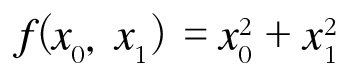

In [1]:
import numpy as np

x = np.array([3.0,4.0])

def loss_func(x):
    return x[0]**2 + x[1]**2

print(loss_func(x))

25.0


## 예제4. 위의 loss_func() 함수를 x0=3, x1=4 에서 x0에 대해서 편미분 했을때의 기울기를  
## 파이썬으로 구현하시오! p.126 참고  

In [33]:
import numpy as np

def function_tmp1(x0):       # 편미분을 적용하기 위해서는 x1을 상수로 취급해야 되기 때문에 x1 = 4를 넣어서 새로운 식을 만든다.
    return x0*x0 +4.0**2.0

def numerical_diff(f,x):
    h = 0.0001
    return (f(x+h)-f(x-h)) / (2*h)

print(numerical_diff(function_tmp1, 3.0))

# 6.00000000000378 에서 378부분은 중앙차분 오차

6.000000000012662


## 예제5. 위의 loss_func() 함수를 x0=3, x1=4 에서 x1에 대해서 편미분 했을때의 기울기를  
## 파이썬으로 구현하시오! p.126 참고  

In [6]:
import numpy as np

def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1

def numerical_diff(f,x):
    h = 0.0001
    return (f(x+h) - f(x-h))/ (2*h) 

print(numerical_diff(function_tmp2, 4.0))

7.999999999999119


## 예제6. 위에서는 각각 별도의 함수를 만들어서 편미분을 했는데 이것을 한번에 할 수 있도록 
## 편미분 함수를 p127 페이지의 아래의 코드를 보고 구현하시오.

In [8]:
import numpy as np

x = np.array([3.0,4.0])

def loss_func(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)
    
def numerical_gradient(f,x):
    h = 1e-4 #0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성 [0 0]
    
    for i in range(x.size): # x.size -> 2 
        tmp_val = x[i] # x[0]  # x = np.array([3.0,4.0])
        
        # f(x+h) 계산
        x[i] = tmp_val +h # 3.0 + 0.0001 = 3.0001
                          # [ 3.0001, 4.0 ]
        fxh1 = f(x) # 3.0001 ** 2 + 4.0 ** 2 = 25.00060001
        
        # f(x-h) 계산
        x[i] = tmp_val - h # 3.0 - 0.0001 = 2.9999
                           # [ 2.9999 , 4.0]
        fxh2 = f(x) # 2.9990 ** 2 + 4.0 ** 2 = 24.99940001
        
        grad[i] = (fxh1 - fxh2) / (2*h)
                # (25.00060001 - 24.99940001) / (2*0.0001) = 6.0
                # [ 6.0, 0]
                
        x[i] = tmp_val # 값 복원
    
    return grad

print(numerical_gradient(loss_func, np.array([3.0,4.0])))

2
[6. 8.]


In [14]:
import numpy as np

x = np.array([3.0,4.0])

def loss_func(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)
    
def numerical_gradient(f,x):
    h = 1e-4 #0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성 [0 0]
    
    for i in range(x.size): # x.size -> 2 
        tmp_val = x[i] # x[1]  # x = np.array([3.0,4.0])
        
        # f(x+h) 계산
        x[i] = tmp_val +h # 4.0 + 0.0001 = 4.0001
                          # [ 3.0, 4.0001 ]
        fxh1 = f(x) # 3.0 ** 2 + 4.0001 ** 2 = 25.00080001
        
        # f(x-h) 계산
        x[i] = tmp_val - h # 4.0 - 0.0001 = 3.9999
                           # [ 3.0 , 3.9999]
        fxh2 = f(x) # 3.0 ** 2 + 3.9999 ** 2 = 24.99920001
        
        grad[i] = (fxh1 - fxh2) / (2*h)
                # (25.00080001 - 24.99920001) / (2*0.0001) = 8.0
                # [ 6.0, 8.0]
                
        x[i] = tmp_val # 값 복원
    
    return grad

print(numerical_gradient(function_2, np.array([3.0,4.0])))

[6. 8.]


## ■ 경사하강법 p.129

__" 특정 가중치의 위치에서 기울기를 빼서 점차 global minima로 진행하는 학습 방법"__

__가중치 = 가중치 - 러닝 레이트 * 기울기__

### __러닝레이트 = 학습률__

__학습률이란 ? :__ 한번의 학습으로 얼마만큼 학습해야할지 즉 매개변수 값(w,b)을 얼마나 갱신하느냐를 정하는 것

학습률 값은 0.01이나 0.001등 미리 특정값으로 정해줘야하는데 일반적으로 이 값이 너무 크거나 작으면 '좋은장소'에 찾아갈 수 없다.

__학습률이 너무 높으면 ->__ 학습은 빠르지만 global minima를 지나칠 수 있다.

__학습률이 너무 적으면 ->__ global minima를 지나칠 염려는 없지만 학습이 너무 느려져서 수렴을 못할 수 있다.

## 예제1. 오전에 만들어둔 편미분하는 numerical_gradient 함수를 이용해서   
## 경사하강을 진행해보시오~ p.131

In [10]:
import numpy as np

def function_2(x):
    return x[0]**2 + x[1]**2

def numerical_gradient(f,x):
    h = 1e-4 #0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성 [0 0]
    
    for i in range(x.size): # x.size -> 2 
        tmp_val = x[i] # x[0]  # x = np.array([3.0,4.0])
        
        # f(x+h) 계산
        x[i] = tmp_val +h # 4.0 + 0.0001 = 4.0001
                          # [ 3.0, 4.0001 ]
        fxh1 = f(x) # 3.0 ** 2 + 4.0001 ** 2 = 25.00080001
        
        # f(x-h) 계산
        x[i] = tmp_val - h # 4.0 - 0.0001 = 3.9999
                           # [ 3.0 , 3.9999]
        fxh2 = f(x) # 3.0 ** 2 + 3.9999 ** 2 = 24.99920001
        
        grad[i] = (fxh1 - fxh2) / (2*h)
                # (25.00080001 - 24.99920001) / (2*0.0001) = 8.0
                # [ 6.0, 8.0]
                
        x[i] = tmp_val # 값 복원
    
    return grad

def gradient_descent(f, init_x, lr=0.01, step_num =100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
        
    return x

init_x = np.array([-3.0,4.0])

gradient_descent(function_2, init_x, lr=0.01, step_num =100)

array([-0.39785867,  0.53047822])

## 예제2. 아래의 2가지 학습률을 각각 테스트 하시오!

1. 학습률 : 10 --> global minima에 도달하지 못하고 발산해 버린다.

2. 학습률 : 1e-10 --> global minima에 도달하지 못하고 중간에서 멈춘다.(수렴하지 못한다.)

In [12]:
# 학습률 10일 때

import numpy as np

def function_2(x):
    return x[0]**2 + x[1]**2

def numerical_gradient(f,x):
    h = 1e-4 #0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성 [0 0]
    
    for i in range(x.size): 
        tmp_val = x[i] 
        
        # f(x+h) 계산
        x[i] = tmp_val +h 
        fxh1 = f(x) 
        
        # f(x-h) 계산
        x[i] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[i] = (fxh1 - fxh2) / (2*h)

                
        x[i] = tmp_val 
    
    return grad

def gradient_descent(f, init_x, lr=10, step_num =100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
        
    return x

init_x = np.array([-3.0,4.0])

gradient_descent(function_2, init_x, lr=10, step_num =100) # 결과가 발산해버린다.

array([-2.58983747e+13, -1.29524862e+12])

In [13]:
# 학습률 10일 때

import numpy as np

def function_2(x):
    return x[0]**2 + x[1]**2

def numerical_gradient(f,x):
    h = 1e-4 #0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성 [0 0]
    
    for i in range(x.size): 
        tmp_val = x[i] 
        
        # f(x+h) 계산
        x[i] = tmp_val +h 
        fxh1 = f(x) 
        
        # f(x-h) 계산
        x[i] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[i] = (fxh1 - fxh2) / (2*h)

                
        x[i] = tmp_val 
    
    return grad

def gradient_descent(f, init_x, lr=1e-10, step_num =100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
        
    return x

init_x = np.array([-3.0,4.0])

gradient_descent(function_2, init_x, lr=1e-10, step_num =100) # 결과가 중간에서 멈춤

array([-2.99999994,  3.99999992])

## ■ 간단한 신경망 구현하기(simpolenet class 생성) p.134

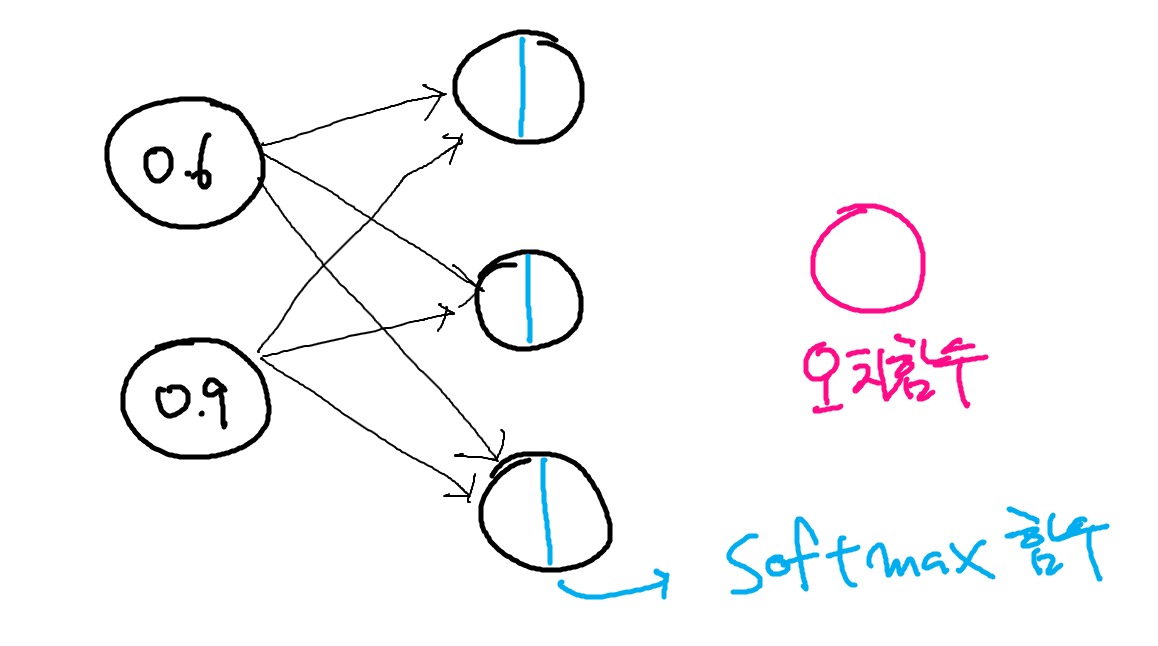

In [ ]:
# 이 때까지 만들어온 코드를 전부다 조합해보자. (유사 레고조립 느낌)

import sys,os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 2x3 행렬의 가중치 생성
        
    def predict(self,x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        return loss

    
net = simpleNet() # 클래스 시작

print(net.W) #가중치 행렬 확인

# 입력값 생성
x = np.array([0.6,0.9])

# 예측값
p = net.predict(x)
print(p)

# 최대값 원소의 인덱스 확인
print(np.argmax(p))

# 오차확인
t = np.array([0,0,1])
print(net.loss(x,t))

## 예제1. 위에 만든 신경망에 2x3 행렬의 기울기가 어떻게 되는지 출력하시오!

In [ ]:
import  sys, os
sys.path.append(os.pardir) 
import  numpy  as  np
from common.functions  import  softmax, cross_entropy_error

class  simpleNet:
    def  __init__(self):
        self.W = np.random.randn(2,3)  # 정규분포로 2x3 행렬의 가중치 생성

    def  predict( self, x ):
        return  np.dot( x, self.W )

    def  loss( self, x, t ):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return  loss 

net = simpleNet()
print ( net.W )  # 가중치 행렬 확인 

# 입력값 생성
x = np.array( [0.6, 0.9] )

# 예측값 
y = net.predict(x)
print (y)

# 최대값 원소의 인덱스 확인
print ( np.argmax(y) ) 

# 오차확인
t = np.array([ 0, 0, 1])
print ( net.loss(x,t)  )


import numpy  as  np

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad


def  f(W):
    return  net.loss(x,t)

dW = numerical_gradient( f,  net.W )
print ( dW ) 

## numpy의 nditer의 이해

__" for문을 사용하지 않고 다차원 배열을 순회하게 하는 함수 "__

In [28]:
import numpy as np

x = np.array([[1,2,3],[4,5,6]])
it = np.nditer(x, flags = ['multi_index'], op_flags = ['readwrite'])

# flags = ['multi_index'] --> 다차원 배열의 인덱스를
# op_flags = ['readwrite'] --> 튜플로 받는다.

while not it.finished:
    print(it.multi_index) # (0,0), (0,1), (0,2), (1,0), (1,1), (1,2)
    print(x[it.multi_index]) # 1,2,3,4,5,6
    
    it.iternext() # 그 다음 리스트로 가라!

(0, 0)
1
(0, 1)
2
(0, 2)
3
(1, 0)
4
(1, 1)
5
(1, 2)
6


## 예제2. 위의 가중치의 기울기를 구하는 코드를 책 136페이지처럼 lambda함수로 구현하시오!  
(lambda : 이름없는 한줄짜리 함수)

In [ ]:
f = lambda w : net.loss(x,t)
dW = numerical_gradient(f, net.W)
print(dW)

## ■ 4. 신경망 학습 알고리즘 구현하기 p.136

이전의 SimpleNet() 클래스는 (단층) --(Upgrade)---> 다층

### * 2층 신경망 클래스에 포함된 함수들

1. __init함수 :__ 신경망 구현시 처음 생성할 가중치와 바이어스를 구성하는 함수
2. __predict 함수 :__ 입력값과 가중치를 받아 예측값을 출력하는 함수
3. __loss 함수 :__ 예측값을 교차엔트로피 함수에 넣어 오차를 출력하는 함수
4. __accuracy 함수 :__ 예측값과 target(정답)을 가지고 정확도를 출력하는 함수
5. __numerical_gradient 함수 :__ 가중치와 바이어스의 각각의 기울기를 출력하는 함수

## ■ 1. init 함수 생성

" 2층 신경망이기 때문에 아래와 같이 구성할 것이다. "

입력층(784개) -----> 은닉1층(100개) -----------> 출력층(10개)

## 예제1. 바이어스를 숫자 0으로 100개를 생성하시오!

In [29]:
import numpy as np

print(np.zeros(100))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## 예제2. TowLayerNet 클래스 이름으로 클래스를 생성하는데   
## 가중치 W1(784x100), W2(100x10) 으로   
## 바이어스는 b1(1x100), b2(1x10)으로 생성하는 init함수를 만드시오!

In [ ]:
import numpy as np
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self):
        self.params = {}
        self.params['W1'] = 0.01 * np.random.randn(784,100) 
        self.params['b1'] = np.zeros(100)
        self.params['W2'] = 0.01 * np.random.randn(100,10)
        self.params['b2'] = np.zeros(10)
        
net = TwoLayerNet()
print(net.params.get('W1').shape) # (784, 100) # params : 딕셔너리 이름 // get('key 이름')  --> values 값이 나온다.
print(net.params.get('W2').shape) # (100, 10)
print(net.params.get('b1').shape) # (100,)
print(net.params.get('b2').shape) # (10,)

## 예제3.   
## 입력값을 넣으면 가중치와 내적해서 예측값을 출력하는 predict 함수를 책 p137을 보고   
## TwoLayerNet 클래스에 구현하시오!
## 아래의 이미지 100장을 흘려보내서 예측결과를 출력하시오

In [ ]:
import numpy as np
import  sys, os
sys.path.append(os.pardir)
from common.functions  import  *
from common.gradient  import  numerical_gradient

class  TwoLayerNet:
    def  __init__(self):
        self.params = { }
        self.params['W1'] = 0.01 * np.random.randn(784,100)
        self.params['b1'] = np.zeros(100)
        self.params['W2'] = 0.01 * np.random.randn(100,10) 
        self.params['b2'] = np.zeros(10) 
        
    def  predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot( x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot( z1, W2) + b2
        y = softmax(a2)
        
        return y 

net = TwoLayerNet()        
x = np.ones((100 ,784)) # 100 x 784 행렬에 1이 모두 채워진 상태
# print (net.predict(x).shape)  # 100 x 10
print(net.predict(x))

In [31]:
import numpy as np

x = np.ones((100,784))
print(x)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


## 예제4. 위의 100x784 확률 벡터 100개가 예측한 숫자 100개 무엇인지 argmax를 이용해서 숫자 100개를 출력하시오!

In [ ]:
import numpy as np
import  sys, os
sys.path.append(os.pardir)
from common.functions  import  *
from common.gradient  import  numerical_gradient

class  TwoLayerNet:
    def  __init__(self):
        self.params = { }
        self.params['W1'] = 0.01 * np.random.randn(784,100)
        self.params['b1'] = np.zeros(100)
        self.params['W2'] = 0.01 * np.random.randn(100,10) 
        self.params['b2'] = np.zeros(10) 
        
    def  predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot( x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot( z1, W2) + b2
        y = softmax(a2)
        
        return y 

net = TwoLayerNet()        
x = np.ones((100 ,784)) # 100 x 784 행렬에 1이 모두 채워진 상태
# print (net.predict(x).shape)  # 100 x 10

y = net.predict(x) # 100 x 10 형태

print(np.argmax(y, axis=1)) 

# axis = 1 행중의 최대값
# axis = 0 열중의 최대값 

## 예제5. (오늘의 마지막 문제) TwoLayerNet 클래스에 p.138 페이지의 loss함수를 추가하고  
## 위의 입력값의 오차를 출력하시오!

In [ ]:
import numpy as np
import  sys, os
sys.path.append(os.pardir)
from common.functions  import  *
from common.gradient  import  numerical_gradient

class  TwoLayerNet:
    def  __init__(self):
        self.params = { }
        self.params['W1'] = 0.01 * np.random.randn(784,100)
        self.params['b1'] = np.zeros(100)
        self.params['W2'] = 0.01 * np.random.randn(100,10) 
        self.params['b2'] = np.zeros(10) 
        
    def  predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot( x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot( z1, W2) + b2
        y = softmax(a2)
        
        return y 
    
    def loss(self, x, t):
        y  = self.predict(x).flatten() # flatten() 을이용하여 2차원을 1차원으로 바꾸어주어야 오류가 안뜬다.

        return cross_entropy_error(y,t)
    
net = TwoLayerNet()  
      
x = np.ones((1,784)) # 1 x 784 행렬에 1이 모두 채워진 상태

t = np.array([0,0,0,0,0,0,0,0,1,0])

y = net.predict(x) # 1 x 10 형태

cost = net.loss(x,t)

print(y)

print(np.argmax(y))

print(cost)

# axis = 1 행중의 최대값
# axis = 0 열중의 최대값 